<a href="https://colab.research.google.com/github/andluizsouza/Machine-Learning-tutorials/blob/master/2-DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dummy classifiers e árvore de decisão**



Importando e lendo um arquivo csv

In [ ]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data_csv = pd.read_csv(uri)
data_csv.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Trocando a classificação de **_no_** e **_yes_** para binários: **_0_**, **_1_**

In [ ]:
change_class = {'yes': 1, 'no': 0}
data_csv['sold'] = data_csv['sold'].map(change_class)
data_csv.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


Criando uma coluna com a idade dos carros

In [ ]:
from datetime import datetime
year_today = datetime.today().year
data_csv['age'] = year_today - data_csv['model_year']
data_csv.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


Descartando as columas que não são de interesse

In [ ]:
data_csv.drop(columns=['Unnamed: 0', 'model_year'], axis=1, inplace=True)
data_csv.head()

,mileage_per_year,price,sold,age
0,21801,30941.02,1,19
1,7843,40557.96,1,21
2,7109,89627.50,0,13
3,26823,95276.14,0,4
4,7935,117384.68,1,5


Separando as features e o classifier

In [ ]:
data_x = data_csv[['mileage_per_year', 'price', 'age']]
data_y = data_csv[['sold']]

## **Modelagem linear**

Separando a amostra de treino e a de teste

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.25, stratify=data_y)
print("The train was made with %d elements and the test with %d elements" %(len(train_x), len(test_x)))

The train was made with 7500 elements and the test with 2500 elements


Acurácia: predição do modelo linear _vs_ amostra teste

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model_linear = LinearSVC()
model_linear.fit(train_x, train_y)
predict_linear = model_linear.predict(test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
score = accuracy_score(test_y, predict_linear)*100
print("The accuracy score from the linear model is %.2f%%" % score)

The accuracy score from the linear model is 58.00%


## **Usando dummy classifiers**

- Como saber se esse modelo fez uma boa estimativa? Comparando com outros estimadores!
- Ele deve ser muito melhor do que um **_dummy classifier_** (um simples baseline test)

A estratégia padrão do _dummy_ é a estratificação: manter a mesma proporção entre 0/1 da amostra de treino

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_str = DummyClassifier()
dummy_str.fit(train_x, train_y)
predict_dummy_str = dummy_str.predict(test_x)

score = accuracy_score(test_y, predict_dummy_str)*100
print("The accuracy score from the stratified dummy model is %.2f%%" % score)

The accuracy score from the stratified dummy model is 52.44%


Usando uma outra estatégia de classificação: _the most frequent_

In [ ]:
dummy_freq = DummyClassifier(strategy='most_frequent')
dummy_freq.fit(train_x, train_y)
score = dummy_freq.score(test_x, test_y)*100
print("The accuracy score from the most_frequent dummy model is %.2f%%" % score)

The accuracy score from the most_frequent dummy model is 58.00%


O modelo linear não é muito melhor que os dummy classifiers, logo devemos mudar a abordagem: 
- testar modelos não-lineares

## **Modelagem não-linear**

Separando amostras de treino e de teste

In [ ]:
SEED = 5
np.random.seed(SEED)
train_x_raw, test_x_raw, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.25, stratify=data_y)
print("The train was made with %d elements and the test with %d elements" %(len(train_x), len(test_x)))

The train was made with 7500 elements and the test with 2500 elements


Rescalonamento em termos da amostra de treino_x

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x_raw)
train_x = scaler.transform(train_x_raw)
test_x = scaler.transform(test_x_raw)

Importando modelo não-linear

In [ ]:
from sklearn.svm import SVC
model_nonlin = SVC()
model_nonlin.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Cálculo da acurácia

In [ ]:
score = model_nonlin.score(test_x, test_y)*100
print("The accuracy score from the non-linear model is %.2f%%" % score)

The accuracy score from the non-linear model is 77.48%


**Esse resultado é melhor que dos dummy classifiers**
- mas qual é o critério de classificação?
- abrindo a caixa preta...

## **Árvore de decisão**

Critérios de classificação: [decision tree classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- PS: não precisamos rescalonar

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(train_x_raw, train_y)
score = model_tree.score(test_x_raw, test_y)*100
print("The accuracy score from the tree classifier model is %.2f%%" % score)

The accuracy score from the tree classifier model is 73.20%


Exportando a visualização gráfica da árvore de decisões

In [ ]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model_tree, out_file=None)
fig_plot = graphviz.Source(dot_data)
fig_plot

**Essa árvore é gigante!!!**
- é impossível interpretar uma árvore com tantas ramificações
- podemos mudar isso alterando a profundidade máxima da árvore: _max_depth_

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=2)
model_tree.fit(train_x_raw, train_y)
score = model_tree.score(test_x_raw, test_y)*100
print("The accuracy score from the tree classifier model is %.2f%%" % score)

The accuracy score from the tree classifier model is 76.84%


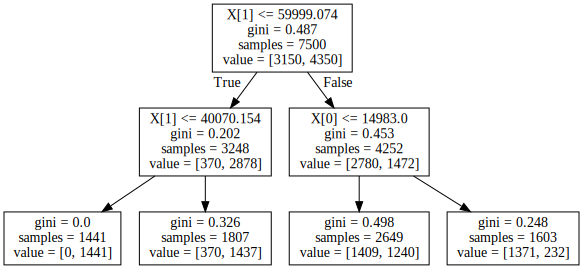

In [ ]:
dot_data = export_graphviz(model_tree, out_file=None)
fig_plot = graphviz.Source(dot_data)
fig_plot

Agora conseguimos ver o gráfico, mas ainda podemos melhorar a visualização

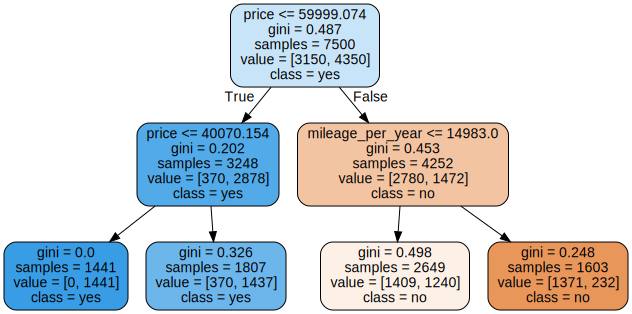

In [ ]:
features = data_x.columns
dot_data = export_graphviz(model_tree, out_file=None, feature_names=features,
                           filled=True, rounded=True, class_names=['no', 'yes'])
fig_plot = graphviz.Source(dot_data)
fig_plot

Aumentado a profundidade para ver mais ramificações da árvore

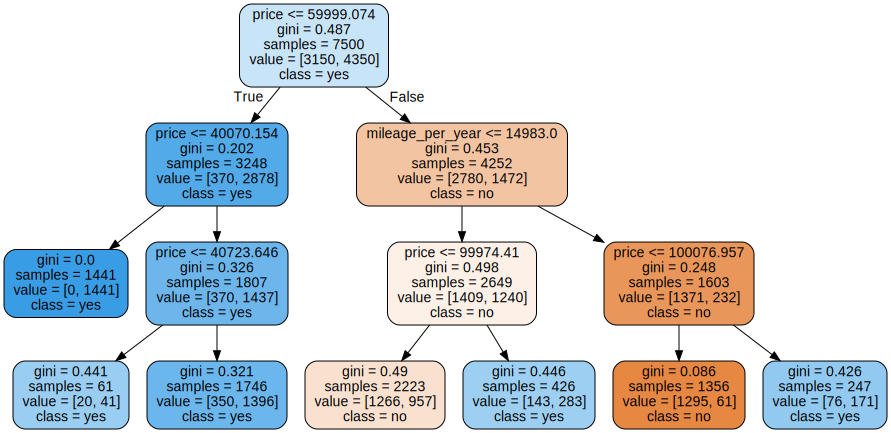

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=3)
model_tree.fit(train_x_raw, train_y)

dot_data = export_graphviz(model_tree, out_file=None, feature_names=features,
                           filled=True, rounded=True, class_names=['no', 'yes'])
fig_plot = graphviz.Source(dot_data)
fig_plot

